# Lesson 4: UNIX commands and statistics

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Folders-and-paths" data-toc-modified-id="Folders-and-paths-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Folders and paths</a></span></li><li><span><a href="#pandas---a-strogn-tool-for-statistics" data-toc-modified-id="pandas---a-strogn-tool-for-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>pandas</code> - a strogn tool for statistics</a></span><ul class="toc-item"><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing data</a></span></li><li><span><a href="#Extracting-data-from-DataFrame" data-toc-modified-id="Extracting-data-from-DataFrame-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Extracting data from <code>DataFrame</code></a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Statistics</a></span></li></ul></li><li><span><a href="#seaborn:-plotting" data-toc-modified-id="seaborn:-plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>seaborn</code>: plotting</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercises</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#For-further-learning" data-toc-modified-id="For-further-learning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>For further learning</a></span></li></ul></div>

## Folders and paths
When you handle a lot of data files, you might want to sort and categorize them in folders.
On a terminal, an important information is in which folder the terminal is working right now, in other words, **current directory**.
In UNIX-based system you can see it by a command `pwd`, in Windows system by `dir`.  
**Caution:** `%` and `!` are needed only on Jupyter Notebook. In other terminals, you don't need them.

In [1]:
%pwd

'C:\\Users\\Ikue\\Dropbox\\PythonCourse'

To change the directory, use `cd [destination folder]`

In [2]:
%cd Lesson4/

C:\Users\Ikue\Dropbox\PythonCourse\Lesson4


In the destination, run `showfiles.py` - this folder shows the files in the current directory and in the child directories.

In [3]:
!python showfiles.py

Files in the current folder
['dummyfiles1', 'iris.csv', 'showfiles.py', 'tips.csv']
Files in the child folders
['dummyfiles1\\text1.txt', 'dummyfiles1\\text2.txt', 'dummyfiles1\\text3.txt', 'dummyfiles1\\text4.txt']


Move to a child directory `dummyfiles1`. From there, you can access to the files in the parent folder by putting `../` before the file name. See the difference of `showfiles.py` results.

In [4]:
%cd dummyfiles1/
!python ../showfiles.py
%cd ../../

C:\Users\Ikue\Dropbox\PythonCourse\Lesson4\dummyfiles1
Files in the current folder
['text1.txt', 'text2.txt', 'text3.txt', 'text4.txt']
Files in the child folders
[]
C:\Users\Ikue\Dropbox\PythonCourse


There are many more useful UNIX commands. On Windows, some commands are in different names, some do not exist. If you'd like to use UNIX commands, install some platforms (see Appendix in [pdf](https://github.com/ikuehirata/CodingSeminarCMBR/Lesson4_ppt.pdf).)

## `pandas` - a strogn tool for statistics

I introduce `pandas`, a module for statistic analysis. While `numpy` provides n-dimentional array and more for numeric functions, `pandas` provides only 2-dimentional array and is more for analytical functions.

Not only analytics, but `pandas` is the first step to machine learning too!

### Importing data

Let's start importing [`tips.csv`](https://github.com/pandas-dev/pandas/blob/master/pandas/tests/data/tips.csv). When you use `numpy`, the strings (texts) in the file are not handled properly without setting appropreate `dtype`.

In [5]:
import numpy as np
dataar = np.genfromtxt("Lesson4/tips.csv", delimiter=",", skip_header=1)
print(dataar)

[[16.99  1.01   nan ...   nan   nan  2.  ]
 [10.34  1.66   nan ...   nan   nan  3.  ]
 [21.01  3.5    nan ...   nan   nan  3.  ]
 ...
 [22.67  2.     nan ...   nan   nan  2.  ]
 [17.82  1.75   nan ...   nan   nan  2.  ]
 [18.78  3.     nan ...   nan   nan  2.  ]]


`pandas` is sperior in this regard; all the data types are treated appropreately without special options. In this example, the table in the file is stored in an object which class is `DataFrame`. Index number (first column) is added automatically (can be omitted by option.)

In [6]:
import pandas as pd
datadf = pd.read_csv("Lesson4/tips.csv")
print(datadf)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


### Extracting data from `DataFrame`
Part of the `DataFrame` is extracted by using conditonal statements and `.at()` or `.loc()` functions.

In [7]:
print(datadf[datadf["sex"]=="Female"])

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun  Dinner     3
..          ...   ...     ...    ...   ...     ...   ...
226       10.09  2.00  Female    Yes   Fri   Lunch     2
229       22.12  2.88  Female    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[87 rows x 7 columns]


### Statistics
Statistics are shown with single command. This function returns a new `DataFrame` object.

In [8]:
datadf.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## `seaborn`: plotting

Plotting the data is easy too. `seaborn` package provides a very easy way to plot the data by column.

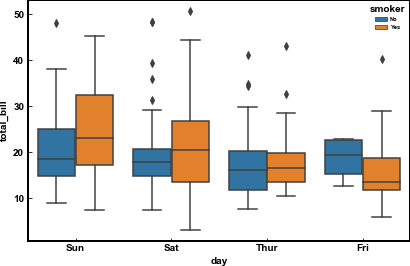

In [9]:
%matplotlib inline
import seaborn as sns
sns.boxplot(x="day", y="total_bill",
            hue="smoker", data=datadf)

Some complicated plotting in grid is easy too. For more details, see [seaborn Example gallery](https://seaborn.pydata.org/examples/index.html). `seaborn` also provides eye-friendly color palettes. If you seek the aesthetics of the graphs, I strongly suggest to take a look.

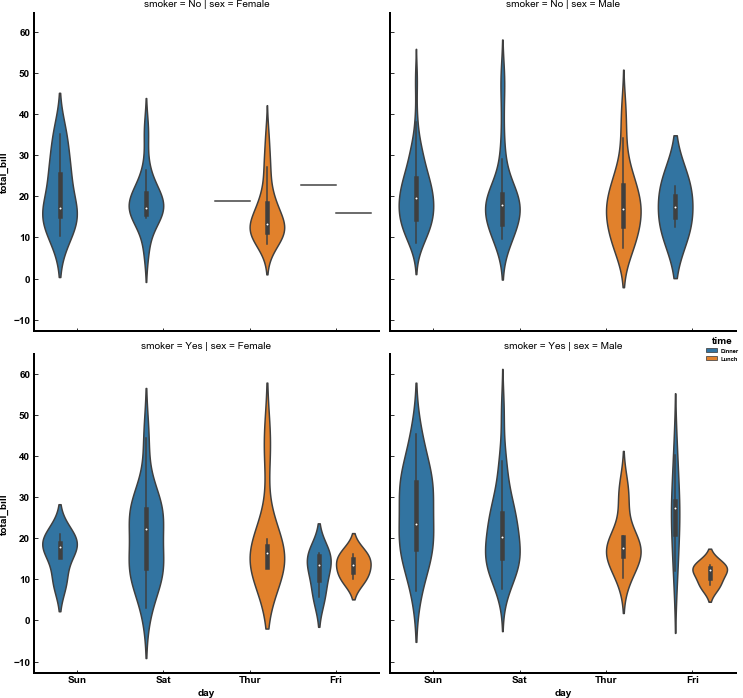

In [10]:
sns.catplot(x="day", y="total_bill", col="sex", row="smoker", hue="time", data=datadf, kind="violin")

With what you have learned in previous lessons, you can now
- open file(s)
- analyze by `numpy`
- store results in table
- handle them as `DataFrame`
- plot them beautifully

## Exercises
[Excercise 1](https://github.com/ikuehirata/CodingSeminarCMBR/blob/master/Lesson4_Exercise1.ipynb)
 [Excercise 2](https://github.com/ikuehirata/CodingSeminarCMBR/blob/master/Lesson4_Exercise2.ipynb)

## References
- [Python official documentation](https://docs.python.org/3.7/)
- [pandas official documentation](https://pandas.pydata.org/) (Links to tutorials are provided)
- [seaborn official documentation](https://seaborn.pydata.org/)
- [Stack Overflow](https://stackoverflow.com/)
- [Think Python: How to Think Like a Computer Scientist](http://greenteapress.com/thinkpython2/html/index.html)
- [Google](http://google.com/)

## For further learning
- [codecademy Learn Python 2](https://www.codecademy.com/learn/learn-python)